# Assignment #2

## Problem 1  Multi-Linear Regression -- Predicting Airfare on New Routes

#### loading packages 

In [1]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

no display found. Using non-interactive Agg backend


#### loading data

In [2]:
airfares = pd.read_csv('/Users/tjmask/Desktop/Semester 2/Big Data II/HW/HW2/Airfares.csv')
airfares.head()

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


### a. Explore the numerical predictors and outcome (FARE) by creating a correlation table and examining some scatterplots between FARE and those predictors. What seems to be the best single predictor of FARE?

In [3]:
## put all the numerical predictors and fare into a new dataframe
df_num = airfares.iloc[:,[4,5,8,9,10,11,12,15,16,17]]
df_num.head()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
0,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864,64.11
1,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820,174.47
2,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452,207.76
3,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47
4,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47


In [4]:
## creating the correlation table
df_num.corr()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
COUPON,1.000000,0.020223,-0.347252,-0.088403,0.046889,-0.107763,0.094970,0.746805,-0.336974,0.496537
NEW,0.020223,1.000000,0.054147,0.026597,0.113377,-0.016672,0.058568,0.080965,0.010495,0.091730
HI,-0.347252,0.054147,1.000000,-0.027382,0.082393,-0.172495,-0.062456,-0.312375,-0.168961,0.025195
S_INCOME,-0.088403,0.026597,-0.027382,1.000000,-0.138864,0.517187,-0.272280,0.028153,0.138197,0.209135
E_INCOME,0.046889,0.113377,0.082393,-0.138864,1.000000,-0.144059,0.458418,0.176531,0.259961,0.326092
S_POP,-0.107763,-0.016672,-0.172495,0.517187,-0.144059,1.000000,-0.280143,0.018437,0.284611,0.145097
E_POP,0.094970,0.058568,-0.062456,-0.272280,0.458418,-0.280143,1.000000,0.115640,0.314698,0.285043
DISTANCE,0.746805,0.080965,-0.312375,0.028153,0.176531,0.018437,0.115640,1.000000,-0.102482,0.670016
PAX,-0.336974,0.010495,-0.168961,0.138197,0.259961,0.284611,0.314698,-0.102482,1.000000,-0.090705
FARE,0.496537,0.091730,0.025195,0.209135,0.326092,0.145097,0.285043,0.670016,-0.090705,1.000000


From the correlation table above and we just focus on the last row which shows the correlations between FARE and other predictors. And we can see that the DISTNACE has the strongest correlation with FARE which is 0.67, followed by COUPON, 0.497.

In [5]:
## get the pairplot of all the variables
### However, we only focus on the last row of graphs
sns.pairplot(df_num, kind='reg')

NameError: name 'sns' is not defined

From the pairplot above, intuitively, we can see that DISTANCE and COUPON have very strong positive correlation with FARE.

### b. Explore the categorical predictors (excluding the first four) by computing the percentage of flights in each category. Create a pivot table with the average fare in each category. Which categorical predictor seems best for predicting FARE?

In [6]:
## put all the categorical predictors and fare into a new dataframe
df_cat = airfares.iloc[:,[6,7,13,14,17]]
df_cat.head()

,VACATION,SW,SLOT,GATE,FARE
0,No,Yes,Free,Free,64.11
1,No,No,Free,Free,174.47
2,No,No,Free,Free,207.76
3,No,Yes,Controlled,Free,85.47
4,No,Yes,Free,Free,85.47


In [7]:
## calculate the percentage of flights in different categories 
## counting the vacation for Yes
a = len(df_cat[df_cat['VACATION']=='Yes'])/len(df_cat)

## counting the SW for Yes
b = len(df_cat[df_cat['SW']=='Yes'])/len(df_cat)

## counting the SLOT for Free
c = len(df_cat[df_cat['SLOT']=='Free'])/len(df_cat)

## counting the Gate for Free
d = len(df_cat[df_cat['SLOT']=='Free'])/len(df_cat)

## getting the percentage table
df_percent = pd.DataFrame({'name':['VACATION','SW','SLOT','GATE'],
                      'Yes/Free':[a,b,c,d],
                      'No/Controlled':[1-a,1-b,1-c,1-d]})
df_percent

,name,Yes/Free,No/Controlled
0,VACATION,0.266458,0.733542
1,SW,0.304075,0.695925
2,SLOT,0.714734,0.285266
3,GATE,0.714734,0.285266


In [8]:
## getting the pivot table for all 
vacation_mean = df_cat.groupby(['VACATION']).mean()

sw_mean = df_cat.groupby(['SW']).mean()
sw_mean

slot_mean = df_cat.groupby(['SLOT']).mean()
slot_mean

gate_mean = df_cat.groupby(['GATE']).mean()
gate_mean

print(vacation_mean)
print(sw_mean)
print(slot_mean)
print(gate_mean)

                FARE
VACATION            
No        173.552500
Yes       125.980882
           FARE
SW             
No   188.182793
Yes   98.382268
                  FARE
SLOT                  
Controlled  186.059396
Free        150.825680
                   FARE
GATE                   
Constrained  193.129032
Free         153.095953


From the result above, we can see that GATE has the highest FARE in both categories, followed by SLOT. So GATE should be the best predictor.

### c. Find a model for predicting the average fare on a new route:

#### i. Convert categorical variables into dummy variables. Then, partition the data into training and validation sets. The model will be fit to the training data and evaluated on the validation set.

In [9]:
## convert categorical variables into dummies
predictors = ['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 
              'S_POP', 'E_POP','DISTANCE', 'PAX', 
              'VACATION', 'SW', 'SLOT','GATE']
label = 'FARE'

## creating feature and label dataframes
X = pd.get_dummies(airfares[predictors], drop_first =True)
y = airfares[label]

In [10]:
## partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

#### ii. Use stepwise regression to reduce the number of predictors. You can ignorethe first four predictors (S_CODE, S_CITY, E_CODE, E_CITY). Report the estimated model selected

In [11]:
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# print coefficients
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures
regressionSummary(train_y, car_lm.predict(train_X))

intercept  31.163044566965368
       Predictor  coefficient
0         COUPON    -4.241138
1            NEW    -3.478314
2             HI     0.007173
3       S_INCOME     0.000898
4       E_INCOME     0.001535
5          S_POP     0.000004
6          E_POP     0.000004
7       DISTANCE     0.076839
8            PAX    -0.000871
9   VACATION_Yes   -35.707005
10        SW_Yes   -40.903121
11     SLOT_Free   -16.167036
12     GATE_Free   -19.441249

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 35.0069
            Mean Absolute Error (MAE) : 27.2808
          Mean Percentage Error (MPE) : -4.4320
Mean Absolute Percentage Error (MAPE) : 20.2262


In [12]:
pred_y = car_lm.predict(train_X)

print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, car_lm))
print('AIC : ', AIC_score(train_y, pred_y, car_lm))
print('BIC : ', BIC_score(train_y, pred_y, car_lm))

adjusted r2 :  0.7721729326613989
AIC :  4467.239449613193
BIC :  4528.744233893493


In [13]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X)

result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - car_lm_pred})
print(result.head(20))

# Compute common accuracy measures
regressionSummary(valid_y, car_lm_pred)

      Predicted  Actual   Residual
101  187.171334  240.88  53.708666
619  308.108362  347.82  39.711638
616  256.501006  279.83  23.328994
446  147.243931  128.36 -18.883931
522  304.501539  289.25 -15.251539
525  231.206312  238.73   7.523688
305  112.745573  140.90  28.154427
41   201.948171  250.73  48.781829
47   181.915438  230.87  48.954562
605  160.355578  164.30   3.944422
455   62.985583  118.17  55.184417
523  314.732380  289.25 -25.482380
339  105.096110  105.41   0.313890
69   143.997110  113.99 -30.007110
473  278.011602  248.49 -29.521602
460  190.148457  252.97  62.821543
635  166.970913  124.87 -42.100913
23   104.139156  106.77   2.630844
554   48.002141  106.65  58.647859
13   142.613870  132.05 -10.563870

Regression statistics

                      Mean Error (ME) : 0.9969
       Root Mean Squared Error (RMSE) : 35.6587
            Mean Absolute Error (MAE) : 28.4282
          Mean Percentage Error (MPE) : -4.4871
Mean Absolute Percentage Error (MAPE) : 21.3122


#### stepwise selection

In [138]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(predictors):
    if len(predictors) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[predictors], train_y)
    return model

def score_model(model, predictors):
    if len(predictors) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[predictors]), model)

best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_Yes, SW_Yes, SLOT_Free, GATE_Free
Start: score=5114.17, constant
Step: score=4855.37, add DISTANCE
Step: score=4717.23, add SW_Yes
Step: score=4574.78, add VACATION_Yes
Step: score=4548.10, add HI
Step: score=4530.65, add SLOT_Free
Step: score=4502.55, add GATE_Free
Step: score=4498.75, add E_INCOME
Step: score=4491.80, add PAX
Step: score=4481.41, add S_POP
Step: score=4465.77, add E_POP
Step: score=4465.61, add S_INCOME
Step: score=4465.33, add NEW
Step: score=4465.33, unchanged None
['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'SLOT_Free', 'GATE_Free', 'E_INCOME', 'PAX', 'S_POP', 'E_POP', 'S_INCOME', 'NEW']


Based on stepwise selection, the best variables we got are ['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'SLOT_Free', 'GATE_Free', 'E_INCOME', 'PAX', 'S_POP', 'E_POP', 'S_INCOME', 'NEW']

#### Repeat (ii) using exhaustive search instead of stepwise regression. Compare the resulting best model to the one you obtained in (ii) in terms of the predictors that are in the model.

In [135]:
def train_model(predictors):
    model = LinearRegression()
    model.fit(train_X[predictors], train_y)
    return model

def score_model(model, predictors):
    pred_y = model.predict(train_X[predictors])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)
print(result)
data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

{'n': 1, 'variables': ['DISTANCE'], 'score': -0.44150301275821313, 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}
     n     r2adj          AIC  COUPON  DISTANCE  E_INCOME  E_POP  GATE_Free     HI    NEW    PAX  \
0    1  0.441503  4855.370804   False      True     False  False      False  False  False  False   
1    2  0.591172  4717.233027   False      True     False  False      False  False  False  False   
2    3  0.703613  4574.778426   False      True     False  False      False  False  False  False   
3    4  0.721438  4548.104940   False      True     False  False      False   True  False  False   
4    5  0.732725  4530.645455   False      True     False  False      False   True  False  False   
5    6  0.749594  4502.554454   False      True     False  False       True   True  False  False   
6    7  0.753913  4495.777236   False      True     False   True      False   True  False   True   
7    8  0.759906  4485.761760   False      

Based on exhustive selection, the best variables we got are ['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'SLOT_Free', 'GATE_Free', 'E_INCOME', 'PAX', 'S_POP', 'E_POP', 'S_INCOME', 'NEW'], which is the same as stepwise selection.

#### iv. Compare the predictive accuracy of both models (ii) and (iii) using measures such as RMSE and average error and lift charts

In [144]:
## get RMSE for stepwise selection model
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

## get RMSE for exhuastive selection model
regressionSummary(valid_y, model.predict(valid_X[variables]))


Regression statistics

                      Mean Error (ME) : 0.9820
       Root Mean Squared Error (RMSE) : 35.6209
            Mean Absolute Error (MAE) : 28.3894
          Mean Percentage Error (MPE) : -4.4848
Mean Absolute Percentage Error (MAPE) : 21.2657

Regression statistics

                      Mean Error (ME) : 0.9969
       Root Mean Squared Error (RMSE) : 35.6587
            Mean Absolute Error (MAE) : 28.4282
          Mean Percentage Error (MPE) : -4.4871
Mean Absolute Percentage Error (MAPE) : 21.3122


#### v. Using model (iii), predict the average fare on a route with the following characteristics: COUPON = 1.202, NEW = 3, VACATION = No, SW = No, HI = 4442.141, S_INCOME = $28,760, E_INCOME = $27,664, S_POP = 4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12,782, DISTANCE = 1976 miles.

In [162]:
## get the average fare
example = np.array([1.202,3, 4442.141, 28760, 27664, 4557004, 3195503, 1976, 12782, 0,0,1,1]).reshape(1,13)
# predicting
print('The predicted fare for this route is:',model.predict(example)[0])

The predicted fare for this route is: 251.05227856402456


#### vi. Predict the reduction in average fare on the route in (v) if Southwest decides to cover this route [using model (iii)].

In [163]:
# predicting
example_2 = np.array([1.202,3, 4442.141, 28760, 27664, 4557004, 3195503, 1976, 12782, 0,0,1,1]).reshape(1,13)
example_3 = np.array([1.202,3, 4442.141, 28760, 27664, 4557004, 3195503, 1976, 12782, 0,1,1,1]).reshape(1,13)


print(model.predict(example_3)[0]- model.predict(example_2)[0])

-40.90312063955554


So the reduction would be 40.9 without Southwest

#### vii. In reality, which of the factors will not be available for predicting the average fare from a new airport (i.e., before flights start operating on those routes)? Which ones can be estimated? How?

The variabels 'NEW', 'PAX', 'VACATION', 'SLOT', 'GATE' are not available from a new airport. However, we can estimate the 'SLOT', 'GATE' by looking at the destinations status to find out whether they are congested or not. While for the 'PAX', we can use similar airport with the population and income in that area to estimate. And for the 'NEW', we can also use the previous data, for example, how many new carriers are entering on average in a week level. 

#### viii. Select a model that includes only factors that are available before flights begin to operate on the new route. Use an exhaustive search to find such amodel

In [168]:
## getting the new data for training and validation 
predictors_New = ['COUPON', 'HI', 'S_INCOME', 'E_INCOME', 
              'S_POP', 'E_POP','DISTANCE', 'SW_Yes']

train_X_New = train_X[predictors_New]

In [175]:
def train_model(predictors):
    model_new = LinearRegression()
    model_new.fit(train_X_New[predictors], train_y)
    return model_new

def score_model(model_new, predictors):
    pred_y = model_new.predict(train_X_New[predictors])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model_new)

allVariables = train_X_New.columns
results = exhaustive_search(allVariables, train_model, score_model)
print(result)
data = []
for result in results:
    model_new = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model_new.predict(train_X_New[variables]), model_new)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

{'n': 8, 'variables': ['COUPON', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP', 'DISTANCE', 'SW_Yes'], 'score': -0.7055509912630558, 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}
   n     r2adj          AIC  COUPON  DISTANCE  E_INCOME  E_POP     HI  SW_Yes  S_INCOME  S_POP
0  1  0.441503  4855.370804   False      True     False  False  False   False     False  False
1  2  0.591172  4717.233027   False      True     False  False  False    True     False  False
2  3  0.622396  4682.790974   False      True     False  False   True    True     False  False
3  4  0.645805  4655.237318   False      True     False  False   True    True     False   True
4  5  0.688221  4599.337252   False      True     False   True   True    True     False   True
5  6  0.692961  4593.488950   False      True     False   True   True    True      True   True
6  7  0.698870  4585.806012    True      True     False   True   True    True      True   True
7  8  0.705551  

So the best model is to include all the variables

#### ix. Use the model in (viii) to predict the average fare on a route withcharacteristics COUPON = 1.202, NEW = 3, VACATION = No, SW = No, HI= 4442.141, S_INCOME = $28,760, E_INCOME = $27,664, S_ POP =4,557,004, E_POP = 3,195,503, SLOT = Free, GATE = Free, PAX = 12,782,DISTANCE = 1976 miles.

In [177]:
## get the average fare
example_new = np.array([1.202, 4442.141, 28760, 27664, 4557004, 3195503, 1976,1]).reshape(1,8)
# predicting
print('The predicted fare for this route is:',model_new.predict(example_new)[0])

The predicted fare for this route is: 199.25338069076696


#### x. Compare the predictive accuracy of this model with model (iii). Is this model good enough, or is it worthwhile reevaluating the model once flights begin on the new route?

The accuarcy of this model is about 70%, while that of the model(iii) is 77% which is relatively much higher. So it's necessary to reevaluate the model once flights begin on the new route. 

### d. In competitive industries, a new entrant with a novel business plan can have a disruptive effect on existing firms. If a new entrant’s business model is sustainable, other players are forced to respond by changing their business practices. If the goal of the analysis was to evaluate the effect of Southwest Airlines’ presence on the airline industry rather than predicting fares on new routes, how would the analysis be different? Describe technical and conceptual aspects

In this case, the label is still FARE. However, we need to focus on the effect of the presence of Southwest Airline in FARE. SO we need to split the data into two parts, one has Southwest Airline, one doesn't have. Then we use the two datasets to build our models. After we got our models, when we evaluating,we just put the test data into two estimated models, and then get the predicted fares. Find the average predicted fares in each models and then compare the two averge fares. The difference would be the effect of the presence Southwest Airlines.

## Problem 2 KNN -- Personal Loan Acceptance

## Import required packages

In [388]:
%matplotlib inline

from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix

## loading data 

In [389]:
loan = pd.read_csv('/Users/tjmask/Desktop/Semester 2/Big Data II/HW/HW2/UniversalBank.csv')
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [390]:
## get dummy variables
loan['Education'] = loan['Education'].astype(str)
loan_dumm = pd.get_dummies(loan)
loan_dumm.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


In [391]:
## partition data
features = ['Age', 'Experience', 'Income','Family', 'CCAvg',
       'Education_1','Education_2','Education_3', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']

label = 'Personal Loan'

X = loan_dumm[features]
y = loan_dumm[label]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print(train_X.shape, valid_X.shape, train_y.shape, valid_y.shape)

(3000, 13) (2000, 13) (3000,) (2000,)


### a. Consider the following customer: Age = 40, Experience = 10, Income = 84, Family = 2, CCAvg = 2, Education_1 = 0, Education_2 = 1, Education_3 = 0, Mortgage = 0, Securities Account = 0, CD Account = 0, Online = 1, and Credit Card = 1. Perform a k-NN classification with all predictors except ID and ZIP code using k = 1. Remember to transform categorical predictors with more than two categories into dummy variables first. Specify the success class as 1 (loan acceptance), and use the default cutoff value of 0.5. How would this customer be classified?

In [392]:
## using KNN to predict 
sample_1  = np.array([40, 10, 84, 2,2,0,0,0,1,1,0,1,0]).reshape(1,13)
knn = KNeighborsClassifier(n_neighbors=1).fit(train_X, train_y)
knn.predict(sample_1)

array([0])

From the answer above, we can see that this customer would be classified to be loan refusal(0).

### b. What is a choice of k that balances between overfitting and ignoring the predictor information?

#### normorlize dataset

In [393]:
scaler = preprocessing.StandardScaler()
scaler.fit(loan_dumm[features])  # Note the use of an array of column names

StandardScaler(copy=True, with_mean=True, with_std=True)

In [394]:
len(scaler.transform(loan_dumm[features]))

5000

In [395]:
# Transform the full dataset
Loan_Norm = pd.concat([pd.DataFrame(scaler.transform(loan_dumm[features]), 
                                    columns=features),
                       loan[label]], axis=1)
Loan_Norm.head()

,Age,Experience,Income,Family,CCAvg,Education_1,Education_2,Education_3,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193385,1.177071,-0.624538,-0.654965,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,0
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250611,1.177071,-0.624538,-0.654965,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,0
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536736,1.177071,-0.624538,-0.654965,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,0
3,-0.901970,-0.968413,0.569765,-1.216855,0.436091,-0.849566,1.601185,-0.654965,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,0
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536736,-0.849566,1.601185,-0.654965,-0.555524,-0.341423,-0.25354,-1.216618,1.549632,0


In [396]:
X_norm = Loan_Norm[features]
y_norm = Loan_Norm[label]

train_X, valid_X, train_y, valid_y = train_test_split(X_norm, y_norm, test_size=0.4, random_state=1)
print(train_X.shape, valid_X.shape, train_y.shape, valid_y.shape)

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

(3000, 13) (2000, 13) (3000,) (2000,)
     k  accuracy
0    1    0.9545
1    2    0.9500
2    3    0.9530
3    4    0.9495
4    5    0.9565
5    6    0.9500
6    7    0.9525
7    8    0.9460
8    9    0.9475
9   10    0.9435
10  11    0.9465
11  12    0.9435
12  13    0.9450
13  14    0.9430


So the best K would be 5.

### c. Show the confusion matrix for the validation data that results from using the best k

In [400]:
## run KNN using the best K
knn_best = KNeighborsClassifier(n_neighbors=5).fit(train_X, train_y)
pred_y = knn_best.predict(valid_X)
confusion_matrix_best = confusion_matrix(valid_y, pred_y)
confusion_matrix_best

array([[1803,    4],
       [  83,  110]])

In [401]:
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.binary):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

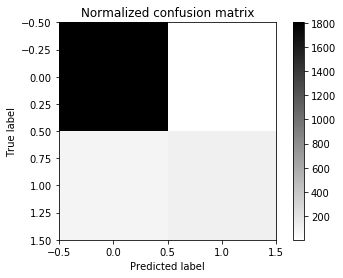

In [402]:
plot_confusion_matrix(confusion_matrix_best, title='Normalized confusion matrix')
# show confusion matrix
# plt.savefig('../Data/confusion_matrix.png', format='png')
plt.show()

### d. Consider the following customer: Age = 40, Experience = 10, Income = 84, Family = 2, CCAvg = 2, Education_1 = 0, Education_2 = 1, Education_3 = 0, Mortgage = 0, Securities Account = 0, CD Account = 0, Online = 1 and Credit Card = 1. Classify the customer using the best k.

In [277]:
## predicting using the best K
sample_2 = np.array([40, 10, 84, 2,2,0,0,0,1,1,0,1,0]).reshape(1,13)
knn_best.predict(sample_2)

array([1])

From the answer above, we can see that this customer would be classified to be loan acceptance(1).

### e. Repartition the data, this time into training, validation, and test sets (50%:30%:20%). Apply the k-NN method with the k chosen above. Compare the confusion matrix of the test set with that of the training and validation sets. Comment on the differences and their reason.

In [278]:
## splitting the data into three parts
train_X_new, test_X, train_y_new, test_y = train_test_split(X, y, test_size=0.2, random_state=1)
train_X_new, valid_X, train_y_new, valid_y = train_test_split(train_X_new, train_y_new, test_size=0.375, random_state=1)

In [293]:
## run KNN using the best K
knn_best = KNeighborsClassifier(n_neighbors=5).fit(train_X_new, train_y_new)
pred_trian = knn_best.predict(train_X_new)
pred_val = knn_best.predict(valid_X)
pred_test = knn_best.predict(test_X)

## get confusion matrix for each 
confusion_matrix_train = confusion_matrix(np.array(train_y_new), pred_trian)
confusion_matrix_val = confusion_matrix(np.array(valid_y), pred_val)
confusion_matrix_test = confusion_matrix(np.array(test_y), pred_test)

print('train data confusion matrix is:\n', confusion_matrix_train)
print('val data confusion matrix is:\n', confusion_matrix_val)
print('test data confusion matrix is:\n', confusion_matrix_test)

train data confusion matrix is:
 [[2229   41]
 [ 121  109]]
val data confusion matrix is:
 [[1306   44]
 [ 103   47]]
tes data confusion matrix is:
 [[866  34]
 [ 64  36]]


From the results showing above, we can see that the train data confusion matrix is much better than both val and test data, which makes sense. This is because, on training data, the model is kind of fixed(I'd like to say it has memories). And also, I would say that the performance of val and test is similar. It also makes sense.

## Problem 3 Naive Bayes Classification -- Automobile Accidents

### lmport required packages

In [21]:
%matplotlib inline

from pathlib import Path

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pylab as plt
from dmba import classificationSummary, gainsChart

### loading data

In [15]:
accident = pd.read_csv('/Users/tjmask/Desktop/Semester 2/Big Data II/HW/HW2/accidentsFull.csv')
accident.head()

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,SUR_COND,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR
0,0,2,2,1,0,1,0,3,0,0,...,4,0,3,1,1,1,1,0,0,1
1,1,2,1,0,0,1,1,3,2,0,...,4,0,3,2,2,0,0,1,0,0
2,1,2,1,0,0,1,0,3,2,0,...,4,1,2,2,2,0,0,1,0,0
3,1,2,1,1,0,0,0,3,2,0,...,4,1,2,2,1,0,0,1,0,0
4,1,1,1,0,0,1,0,3,2,0,...,4,0,2,3,1,0,0,1,0,0


In [16]:
## transforming data
accident['INJURY'] = accident['MAX_SEV_IR']
m  = accident['MAX_SEV_IR'] == 1
n  = accident['MAX_SEV_IR'] == 2
accident['INJURY'][m] = 1
accident['INJURY'][n] = 1
accident.head()

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR,INJURY
0,0,2,2,1,0,1,0,3,0,0,...,0,3,1,1,1,1,0,0,1,1
1,1,2,1,0,0,1,1,3,2,0,...,0,3,2,2,0,0,1,0,0,0
2,1,2,1,0,0,1,0,3,2,0,...,1,2,2,2,0,0,1,0,0,0
3,1,2,1,1,0,0,0,3,2,0,...,1,2,2,1,0,0,1,0,0,0
4,1,1,1,0,0,1,0,3,2,0,...,0,2,3,1,0,0,1,0,0,0


### a. Using the information in this dataset, if an accident has just been reported and no further information is available, what should the prediction be?(INJURY = Yes or No?) Why?

Answer: in this case, the prediction should be get injured or not. Because, the Injury is a dummy variable now and only have two results. 

### b. Select the first 12 records in the dataset and look only at the response (INJURY) and the two predictors WEATHER_R and TRAF_CON_R.

In [17]:
## getting the data
df_temp = accident[0:12][['WEATHER_R','TRAF_CON_R','INJURY']]
df_temp

,WEATHER_R,TRAF_CON_R,INJURY
0,1,0,1
1,2,0,0
2,2,1,0
3,1,1,0
4,1,0,0
5,2,0,1
6,2,0,0
7,1,0,1
8,2,0,0
9,2,0,0


#### i. Create a pivot table that examines INJURY as a function of the two predictors for these 12 records. Use all three variables in the pivot table as rows/columns.

In [18]:
## creating pivot table
pivot_table = df_temp.groupby(['INJURY','WEATHER_R','TRAF_CON_R']).count()
pivot_table

Empty DataFrame
Columns: []
Index: [(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (1, 1, 0), (1, 2, 0)]

#### ii. Compute the exact Bayes conditional probabilities of an injury (INJURY = Yes) given the six possible combinations of the predictors.

From the data, we can easily compute the probabilities: Pr(WEATHER_R=1,TRAF_CON_R=0|INJURY = Yes)=2/3,   Pr(WEATHER_R=2,TRAF_CON_R=0|INJURY = Yes)=1/3, Pr(WEATHER_R=1,TRAF_CON_R=1|INJURY = Yes)=0,   Pr(WEATHER_R=2,TRAF_CON_R=1|INJURY = Yes)=0,Pr(WEATHER_R=1,TRAF_CON_R=2|INJURY = Yes)=0,   Pr(WEATHER_R=2,TRAF_CON_R=2|INJURY = Yes)=0. 

#### iii. Classify the 12 accidents using these probabilities and a cutoff of 0.5

From above probabilities, we can see that only row 1 and row 8 are classifed to be injury, others are classified to be not injury.

#### iv. Compute manually the naive Bayes conditional probability of an injury given WEATHER_R = 1 and TRAF_CON_R = 1.


Pr(WEATHER_R=1,TRAF_CON_R=1|INJURY = Yes)=0

#### v. Run a naive Bayes classifier on the 12 records and 2 predictors using scikit-learn. Check the model output to obtain probabilities and classifications for all 12 records. Compare this to the exact Bayes classification. Are the resulting classifications equivalent? Is the ranking (=ordering) of observations equivalent?

In [19]:
df_temp.head()[['WEATHER_R','TRAF_CON_R']]

,WEATHER_R,TRAF_CON_R
0,1,0
1,2,0
2,2,1
3,1,1
4,1,0


In [22]:
# run naive Bayes
simple_nb = MultinomialNB(alpha=0.01)
simple_nb.fit(df_temp[['WEATHER_R','TRAF_CON_R']],df_temp[['INJURY']])

# predict probabilities
predProb_simple = simple_nb.predict_proba(df_temp[['WEATHER_R','TRAF_CON_R']])
prob_list = []
for i in range(12):
    prob = predProb_simple[i][0]*predProb_simple[i][1]
    prob_list.append(prob)
print(np.array(prob_list).reshape(1,12))

[[2.08561610e-01 2.26743867e-01 6.20546371e-03 4.92220484e-03
  2.08561610e-01 2.26743867e-01 2.26743867e-01 2.08561610e-01
  2.26743867e-01 2.26743867e-01 2.26743867e-01 5.86483925e-05]]


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We can see that the resulting classifications is not equivalent. And the ranking (=ordering) of observations is not equivalent either.

### c. Let us now return to the entire dataset. Partition the data into training (60%) and validation (40%).

In [23]:
# split into training and validation
needed_feature = ['HOUR_I_R', 'ALCHL_I', 'ALIGN_I', 'STRATUM_R', 
'WRK_ZONE', 'WKDY_I_R', 'INT_HWY', 'LGTCON_I_R', 'MANCOL_I_R', 
'PED_ACC_R', 'RELJCT_I_R', 'REL_RWY_R', 'PROFIL_I_R', 'SPD_LIM', 
'SUR_COND', 'TRAF_CON_R', 'TRAF_WAY', 'VEH_INVL', 'WEATHER_R', 'FATALITIES']
# 'NO_INJ_I', 'PRPTYDMG_CRASH',
label = 'INJURY'

X = accident[needed_feature]
y = accident[label]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=1)

#### i. Assuming that no information or initial reports about the accident itself are available at the time of prediction (only location characteristics, weather conditions, etc.), which predictors can we include in the analysis? (Use the data descriptions page from
www.dataminingbook.com.)

We should include 'HOUR_I_R', 'ALCHL_I', 'ALIGN_I', 'STRATUM_R', 'WRK_ZONE', 'WKDY_I_R',
       'INT_HWY', 'LGTCON_I_R', 'MANCOL_I_R', 'PED_ACC_R', 'RELJCT_I_R',
       'REL_RWY_R', 'PROFIL_I_R', 'SPD_LIM', 'SUR_COND', 'TRAF_CON_R',
       'TRAF_WAY', 'VEH_INVL', 'WEATHER_R',  'NO_INJ_I',
       'PRPTYDMG_CRASH', 'FATALITIES'

#### ii. Run a naive Bayes classifier on the complete training set with the relevant predictors (and INJURY as the response). Note that all predictors are categorical. Show the confusion matrix.

In [24]:
# run naive Bayes
nb = MultinomialNB(alpha=0.01)
nb.fit(X_train,y_train)

# predict the result on training data
pred_result = nb.predict(X_train)
pred_result

classificationSummary(y_train, pred_result, class_names=[0,1]) 

Confusion Matrix (Accuracy 0.5677)

       Prediction
Actual    0    1
     0 8595 3797
     1 7145 5772


The result seems to be very bad.

#### iii. What is the overall error for the validation set?

In [25]:
# predict the result on validation data
pred_val = nb.predict(X_valid)

classificationSummary(y_valid, pred_val, class_names=[0,1]) 

Confusion Matrix (Accuracy 0.5681)

       Prediction
Actual    0    1
     0 5761 2568
     1 4720 3825


#### iv. What is the percent improvement relative to the naive rule (using the validation set)?

From the result........

#### v. Examine the conditional probabilities in the pivot tables. Why do we get a probability of zero for P(INJURY = No ∣ SPD_LIM = 5)?

Answer: This is becasue, there might be some conditions that didn't occur  at the samein dataset. And it would lead to a 0 probabilities. It's very common that when there are so many features. Because the probabilities of many feature that happen at the same time can be very low!